## Lab 6 code

### Segmentation of satellite data

#### Load in the image and do basic transformations if needed

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from matlab_functions import *

(818, 934, 3)
(764012, 3)
1.0
0.00392156862745098


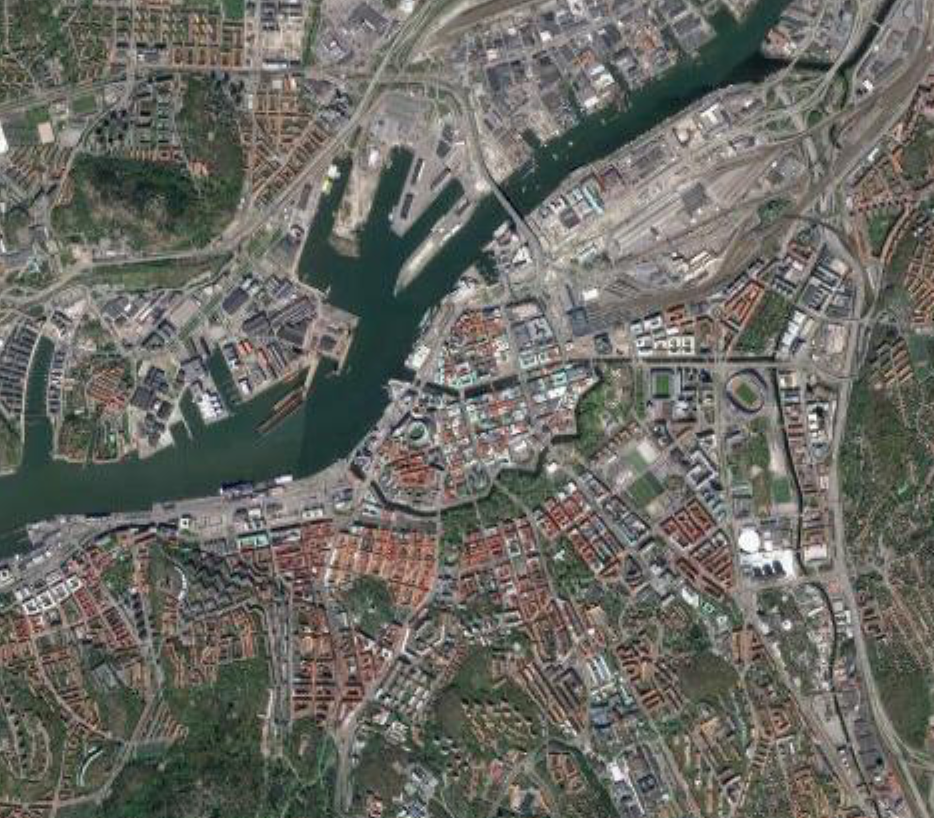

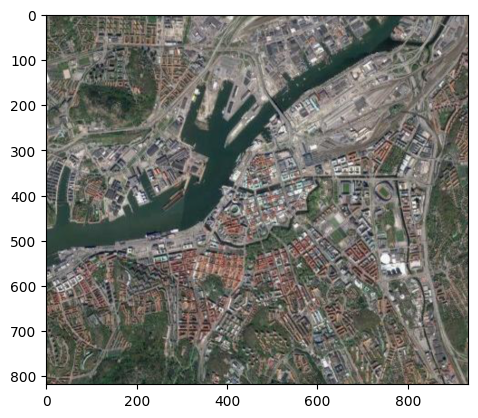

In [18]:
image = Image.open("gothenburg_satellite.png")
data = np.array(image).astype(np.double)[:, :, :-1] / 255
data_flattened = data.reshape(data.shape[0]*data.shape[1], data.shape[2])
print(data.shape)
print(data_flattened.shape)
print(data.max())
print(data.min())
image.show()

#### Plot helper function

In [23]:
def plotKclasses(cl, K, stacked_image):
    for i in range(K):
        I_class = stacked_image.copy()
        I_class[cl != i, :] = 1
        plt.imshow(I_class.reshape(818, 934, 3))
        plt.show()

#### Perform segmentation using kmeans

In [33]:
k = 6
idx, pars = normmix_kmeans(x=data_flattened, K=k)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


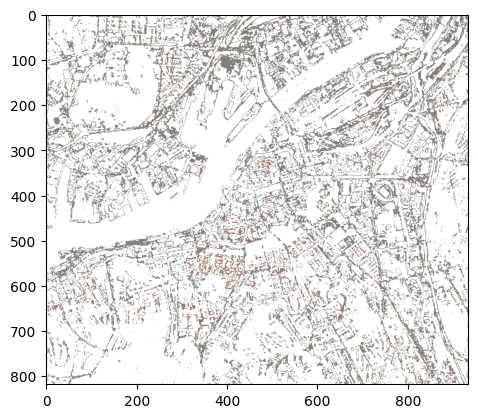

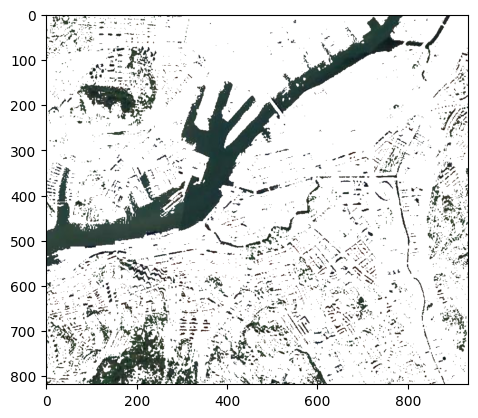

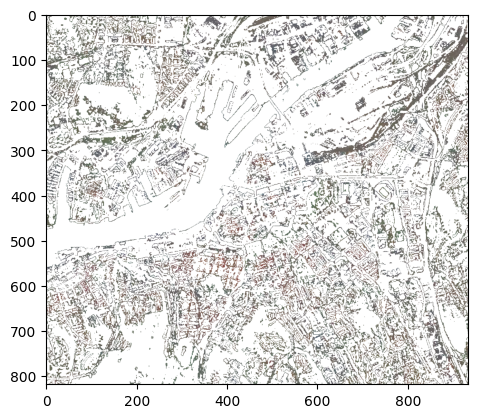

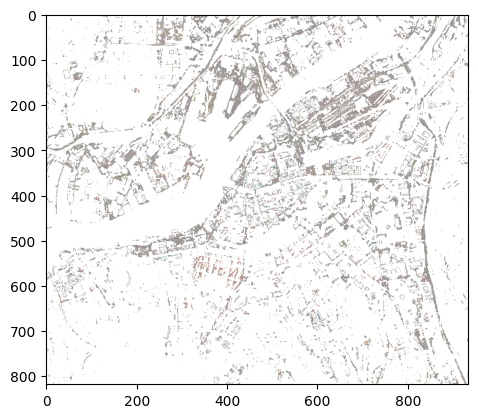

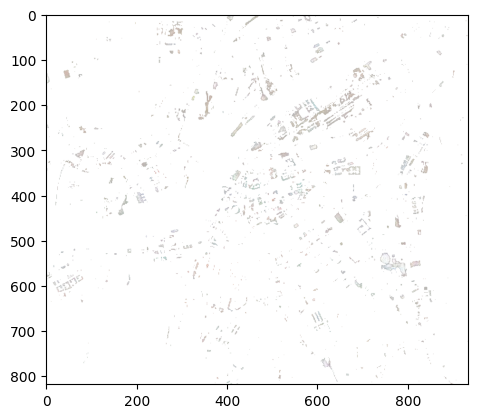

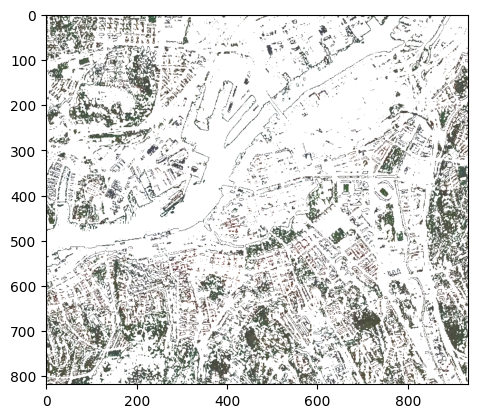

In [34]:
plotKclasses(idx, k, data_flattened)

#### Using normmix_sgd

In [37]:
k = 5
idx, pars = normmix_kmeans(x=data_flattened, K=k)
cl, p = normmix_classify(x=data_flattened, pars=pars)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


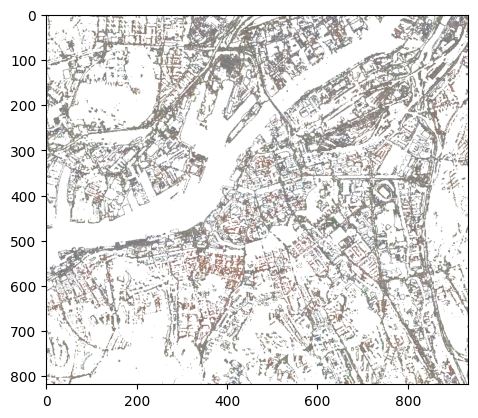

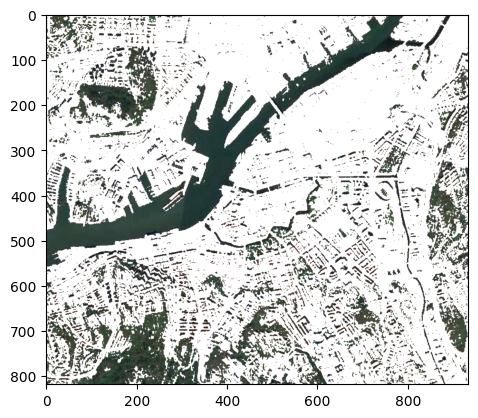

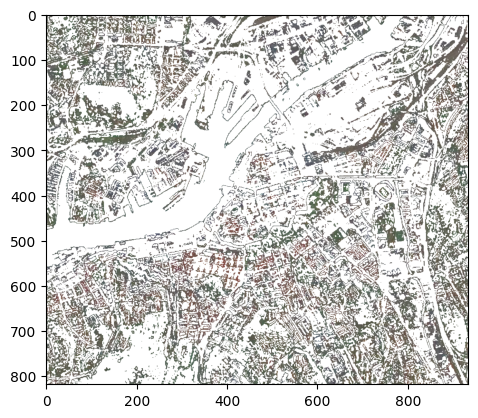

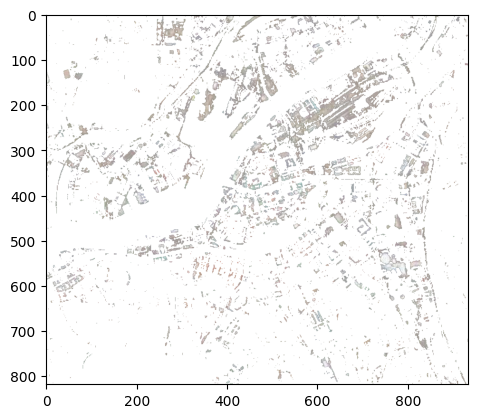

In [38]:
plotKclasses(cl, k, data_flattened)